## Titanic

In [ ]:
#test a variety of models

In [1]:
#pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.impute import SimpleImputer 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import xgboost as xgb
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import sklearn 
print (sklearn.__version__)

1.2.1


## Import

In [3]:
raw_df = pd.read_csv('train.csv')

In [4]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_df.shape

(891, 12)

In [6]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
raw_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#change dtypes to category for relevant variables

raw_df.Survived = raw_df.Survived.astype('category')
raw_df.Sex = raw_df.Sex.astype('category')

In [10]:
raw_df.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [11]:
test_df = pd.read_csv('test.csv')

In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## NaNs Check

In [13]:
raw_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
#pd.DataFrame(imp.fit_transform(df))

raw_df['Age'] = pd.DataFrame(imputer.fit_transform(raw_df[['Age']]))

In [16]:
raw_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [17]:
#cabin and embarked handle of NaN? Just convert to '-1'?

raw_df['Cabin'] = raw_df['Cabin'].fillna('-1')
raw_df['Embarked'] = raw_df['Embarked'].fillna('-1')



In [18]:
raw_df.loc[raw_df.Embarked == '-1']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,-1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,-1


In [19]:
#check all false

raw_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

## EDA

### Barcharts

In [20]:
raw_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [21]:
raw_df.groupby('Survived')['Survived'].count().values

array([549, 342], dtype=int64)

Text(0.5, 1.0, 'Survived Vs Dead')

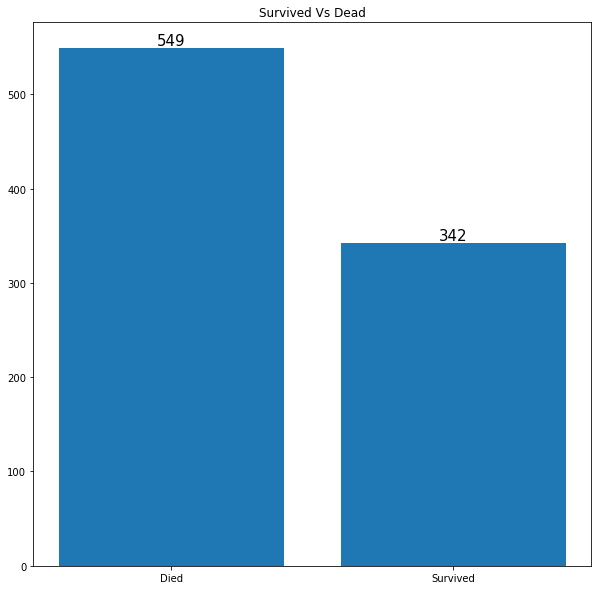

In [22]:
fig, ax = plt.subplots(figsize = (10,10))

plt.bar(raw_df.groupby('Survived')['Survived'].count().index.astype(str), raw_df.groupby('Survived')['Survived'].count().values)
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.xticks([0,1],['Died','Survived'])
plt.title('Survived Vs Dead')

In [23]:
 raw_df.loc[raw_df.Sex == 'male'].groupby(['Sex','Survived'])['Fare'].count().reset_index()

,Sex,Survived,Fare
0,female,0,0
1,female,1,0
2,male,0,468
3,male,1,109


In [24]:
raw_df.loc[raw_df.Sex == 'male'].groupby(['Sex','Survived'])['Fare'].count().reset_index().set_index('Sex').index

CategoricalIndex(['female', 'female', 'male', 'male'], categories=['female', 'male'], ordered=False, name='Sex', dtype='category')

Text(0.5, 1.0, 'Male Vs Female Passengers')

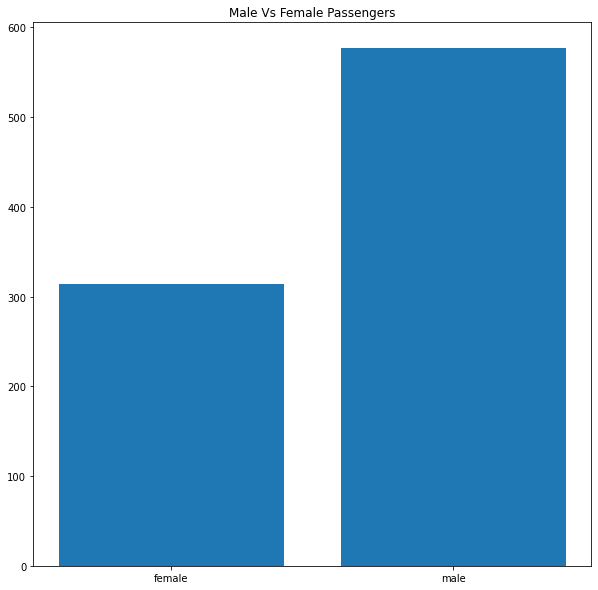

In [25]:
fig, ax = plt.subplots(figsize = (10,10))

plt.bar(raw_df.groupby('Sex')['Sex'].count().index.astype(str), raw_df.groupby('Sex')['Sex'].count().values)


plt.title('Male Vs Female Passengers')

Text(0.5, 1.0, 'Survived Vs Dead')

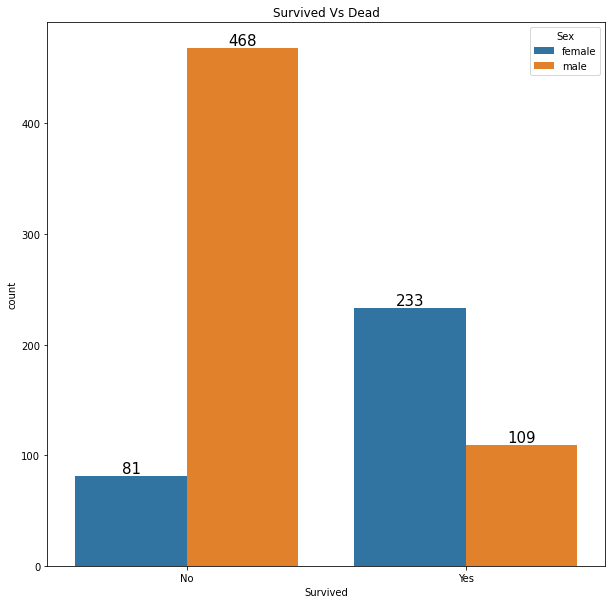

In [20]:
fig, ax = plt.subplots(figsize = (10,10))

sns.countplot(x='Survived',hue = 'Sex', data = raw_df)
plt.xticks([0,1],['No','Yes'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 8), 
                   textcoords = 'offset points')

plt.title('Survived Vs Dead')

In [21]:
#male survival

109 / (109+468)

0.18890814558058924

In [22]:
#female survival

233 / (233 +81)

0.7420382165605095

Text(0.5, 1.0, 'Survived Vs Dead')

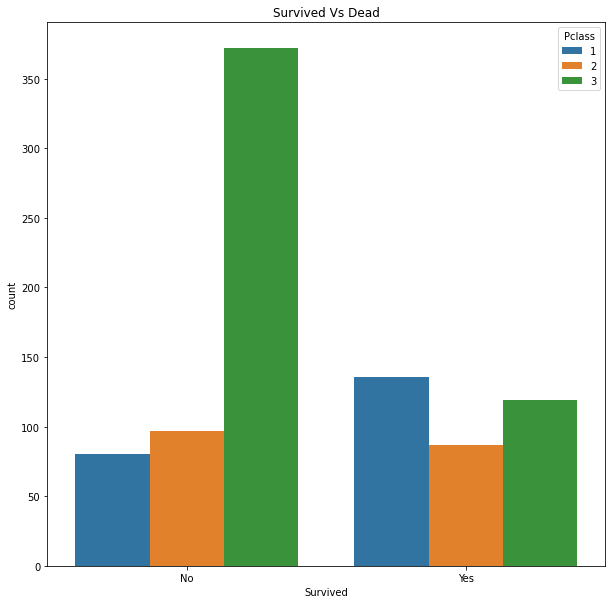

In [28]:
fig, ax = plt.subplots(figsize = (10,10))

sns.countplot(x='Survived',hue = 'Pclass', data = raw_df)
plt.xticks([0,1],['No','Yes'])

plt.title('Survived Vs Dead')

In [45]:
raw_df.loc[raw_df.Sex == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,-1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,-1,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,-1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,-1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,-1,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,-1,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,-1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

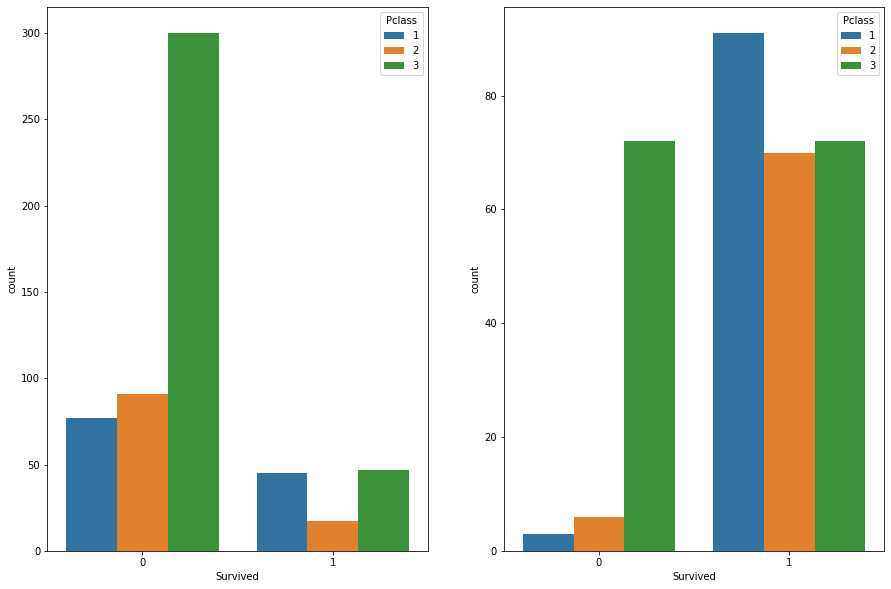

In [50]:
plt.subplots(1,2, figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(x='Survived',hue = 'Pclass', data = raw_df.loc[raw_df.Sex == 'male'])
plt.subplot(1,2,2)
sns.countplot(x='Survived',hue = 'Pclass', data = raw_df.loc[raw_df.Sex == 'female'])

In [26]:
# chart = alt.Chart(prediction_table2, title='Simulated (attainable) and predicted yield ').mark_bar(
#     opacity=1,
#     ).encode(
#     column = alt.Column('date:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
#     x =alt.X('variable', sort = ["Actual_FAO", "Predicted", "Simulated"],  axis=None),
#     y =alt.Y('value:Q'),
#     color= alt.Color('variable')
# ).configure_view(stroke='transparent')

# chart.display()

In [23]:
chart = alt.Chart(raw_df).mark_bar(opacity = 1).encode(
    alt.Column('Sex:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    alt.X('Pclass:O', sort = ["P1", "P2", "P3"],  axis=None),
    alt.Y('count(Survived):Q'),
    alt.Color('Survived:N'),
    ).properties(
    width=250,
    height=250
).configure_view(stroke='transparent')
    
chart.display()

alt.Chart(...)

In [24]:
#if female in  Pclass 1 or 2 - very high likelihood of survival ; males low likelihood

#Pclass 3 - 50/50 female survival; male extremely unlikely

bars = alt.Chart(raw_df).mark_bar().encode(
    alt.X('Sex:N'),
    alt.Y('count(Survived)'),
    color = 'Survived:N',
    ).properties(
    width=250,
    height=250
)
    
# add a layer to group bars with respect to countries
alt.layer(bars).facet(
    column='Pclass'
)

alt.FacetChart(...)

In [25]:
chart4 = alt.Chart(raw_df).mark_bar().encode(
    alt.Column('Survived'),
    alt.X('Embarked'),
    alt.Y('count(Survived)'),
    color = 'Sex'
).properties(
    width=800,
    height=300
)

chart4

alt.Chart(...)

In [26]:

# chart = Chart(df).mark_bar().encode(
#    column=Column('Genre', 
#                  axis=Axis(axisWidth=1.0, offset=-8.0, orient='bottom'),
#                  scale=Scale(padding=4.0)),
#    x=X('Gender', axis=False),
#    y=Y('Rating', axis=Axis(grid=False)),
#    color=Color('Gender', scale=Scale(range=['#EA98D2', '#659CCA']))
# ).configure_facet_cell(
#     strokeWidth=0.0,
# )

# chart.display()


chart4 = alt.Chart(raw_df).mark_bar().encode(
    alt.Column('Embarked'),
    alt.X('Sex'),
    alt.Y('count(Survived)',axis=alt.Axis(grid=False)),
    alt.Color('Sex')
).properties(
    width=800,
    height=300
)

chart4

alt.Chart(...)

### Histograms

In [27]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


In [28]:
raw_df[['Age','Fare','SibSp','Parch']].columns

Index(['Age', 'Fare', 'SibSp', 'Parch'], dtype='object')

In [29]:
# for column in zip(enumerate(raw_df[['Age','Fare','SibSp','Parch']].columns), freq):
#     print(column[0][1])

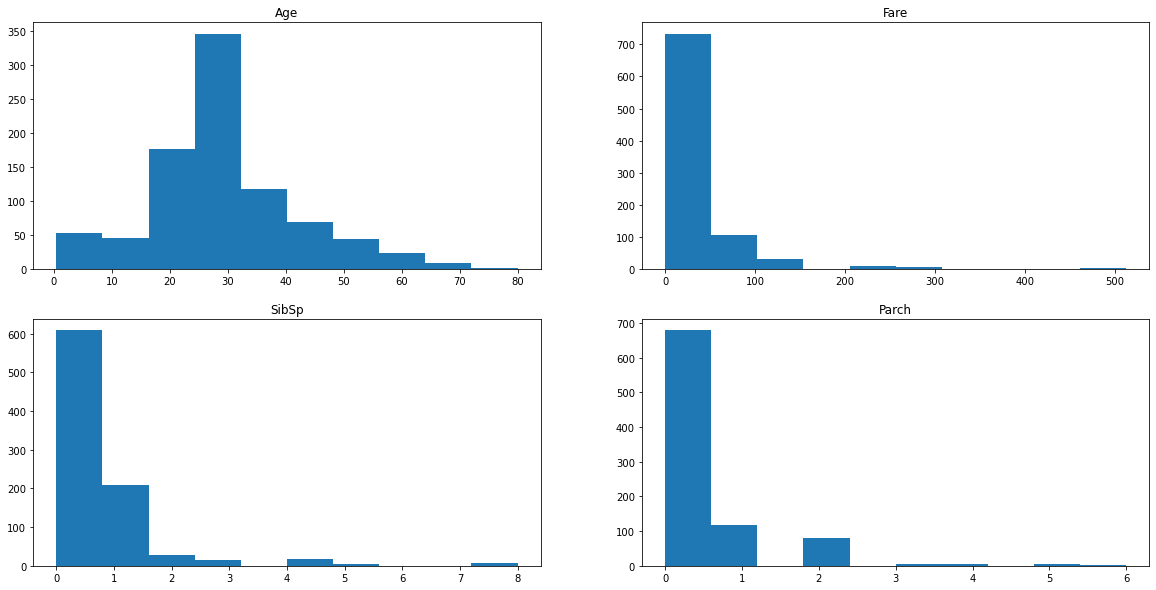

In [30]:
#age, fare, siblings, parents and cabin

fig, ax = plt.subplots(2,2,figsize = (20,10))
freq = [(0,0),(0,1),(1,0),(1,1)]

for column in zip(enumerate(raw_df[['Age','Fare','SibSp','Parch']].columns), freq):
    ax[column[1]].hist(raw_df[[column[0][1]]].values)
    ax[column[1]].set_title(column[0][1])
    

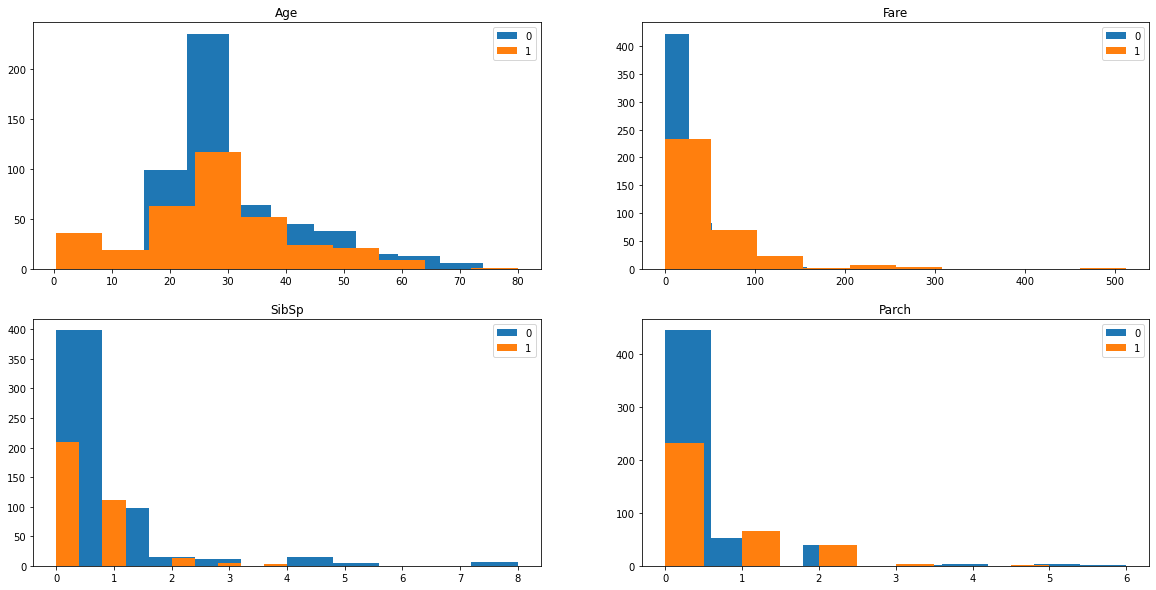

In [31]:
#age, fare, siblings, parents and cabin of survived and not survived

fig, ax = plt.subplots(2,2,figsize = (20,10))
freq = [(0,0),(0,1),(1,0),(1,1)]
survival = [0, 1]

for column in zip(enumerate(raw_df[['Age','Fare','SibSp','Parch']].columns), freq):
    for survive in survival:
        ax[column[1]].hist(raw_df[[column[0][1]]].loc[raw_df.Survived == survive].values, label = survive)
        ax[column[1]].set_title(column[0][1])
        ax[column[1]].legend()
    

### Boxplots

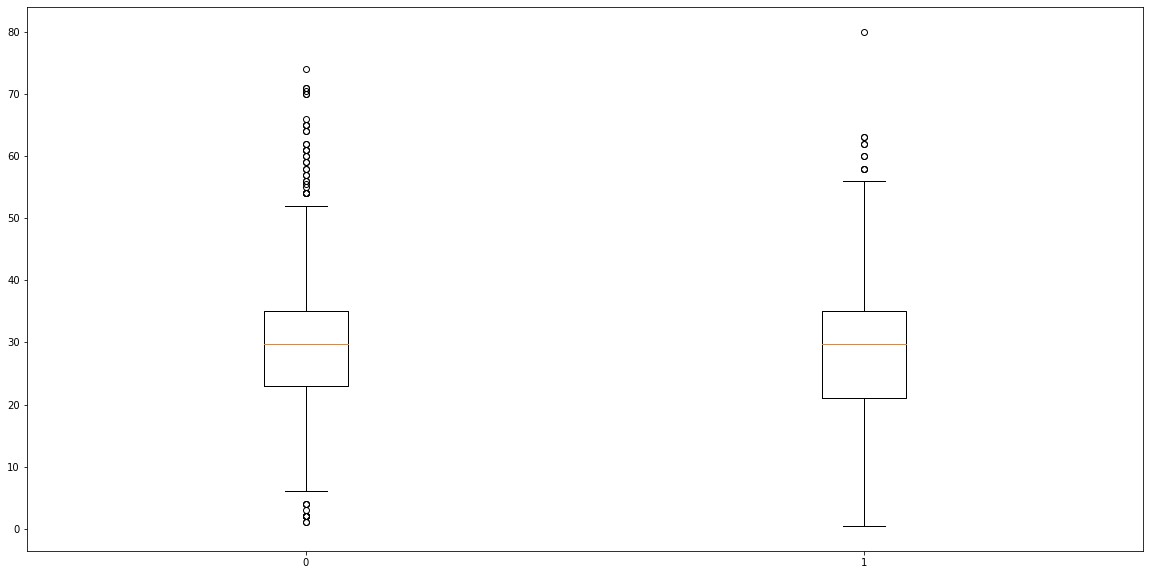

In [60]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
survival = [0, 1]
x = 0

for survive in survival:
    x += 1
    ax.boxplot(x = raw_df.loc[raw_df.Survived == survive]['Age'].values, positions=[x], labels = str(survive))
    #plt.xticks([0,1],['No','Yes'])
    #ax.set_xticks(['No','Yes'])
    #ax.boxplot()

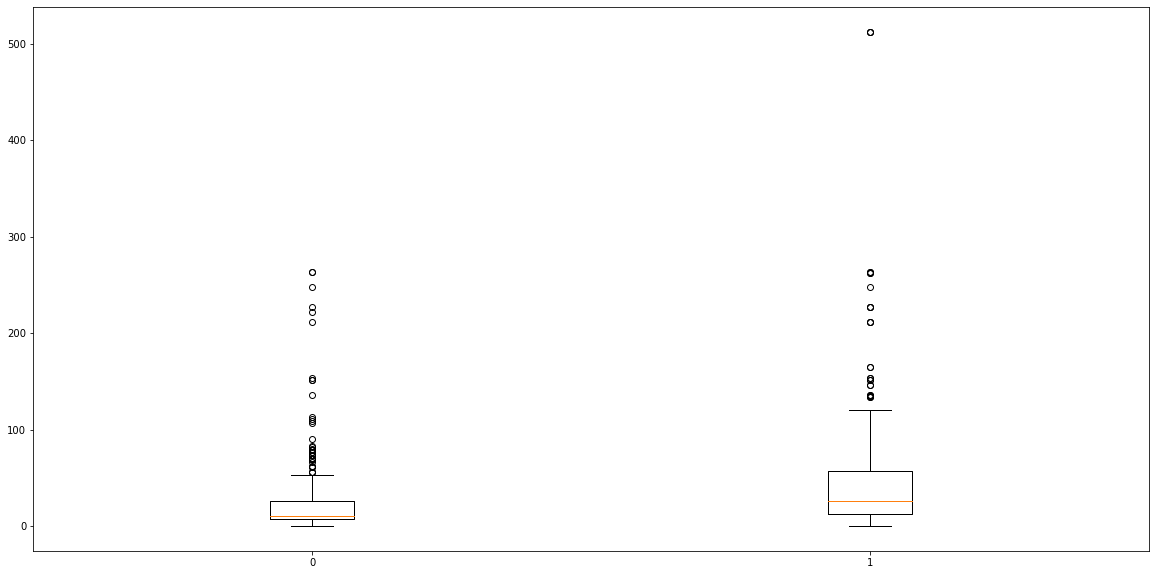

In [61]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
survival = [0, 1]
x = 0

for survive in survival:
    x += 1
    ax.boxplot(x = raw_df.loc[raw_df.Survived == survive]['Fare'].values, positions=[x], labels = str(survive))
    #plt.xticks([0,1],['No','Yes'])
    #ax.set_xticks(['No','Yes'])
    #ax.boxplot()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

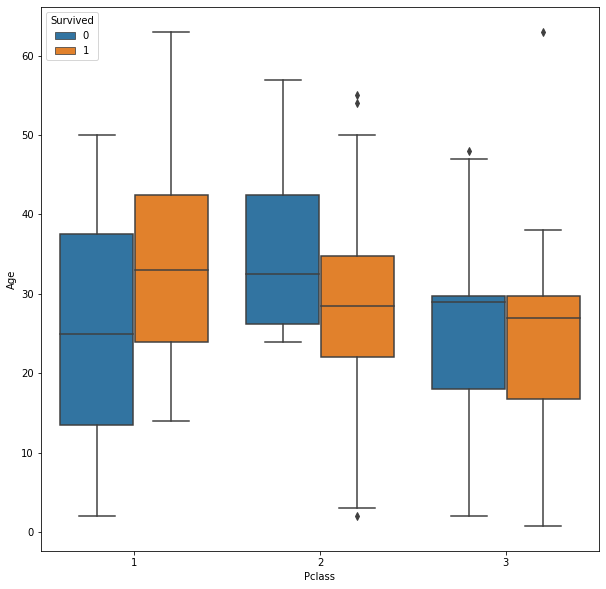

In [62]:
plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Pclass', y ='Age', hue = 'Survived', data = raw_df.loc[raw_df.Sex == 'female'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

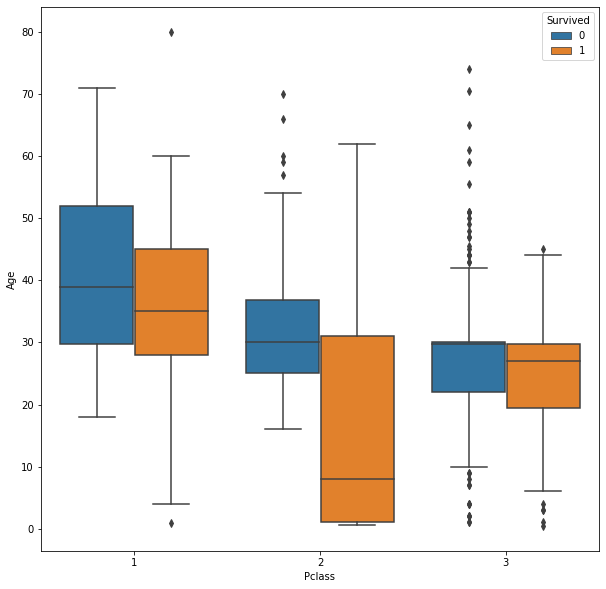

In [40]:
plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Pclass', y ='Age', hue = 'Survived', data = raw_df.loc[raw_df.Sex == 'male'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

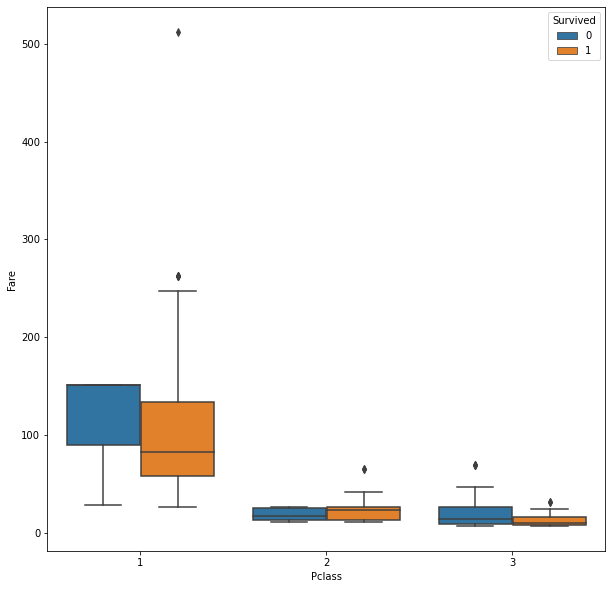

In [63]:
plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Pclass', y ='Fare', hue = 'Survived', data = raw_df.loc[raw_df.Sex == 'female'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

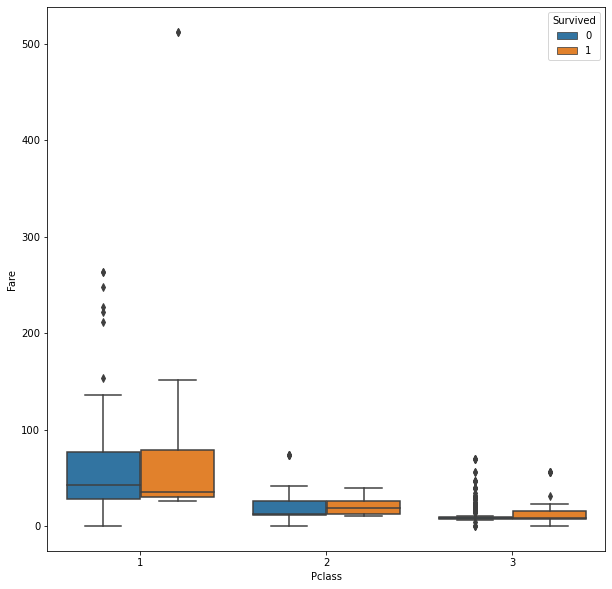

In [64]:
plt.subplots(figsize = (10,10))
sns.boxplot(x = 'Pclass', y ='Fare', hue = 'Survived', data = raw_df.loc[raw_df.Sex == 'male'])

In [43]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


### Heatmap

<AxesSubplot:>

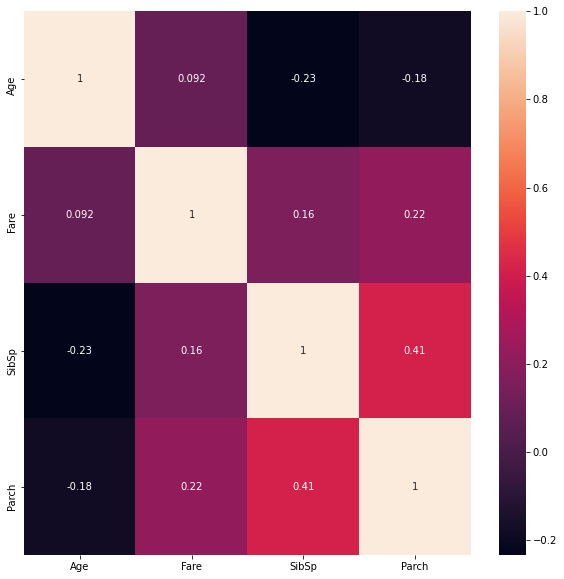

In [44]:
#overall

plt.subplots(figsize = (10,10))
sns.heatmap(raw_df[['Age','Fare','SibSp','Parch']].corr(), annot=True)

<AxesSubplot:>

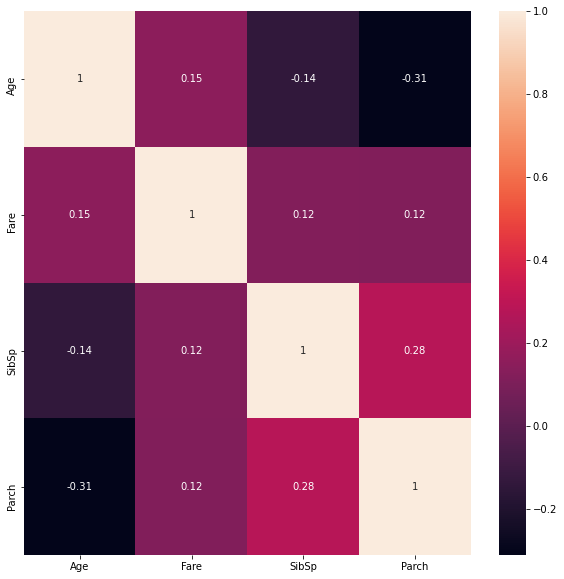

In [45]:
#survived

plt.subplots(figsize = (10,10))
sns.heatmap(raw_df.loc[raw_df['Survived'] == 1][['Age','Fare','SibSp','Parch']].corr(), annot=True)

<AxesSubplot:>

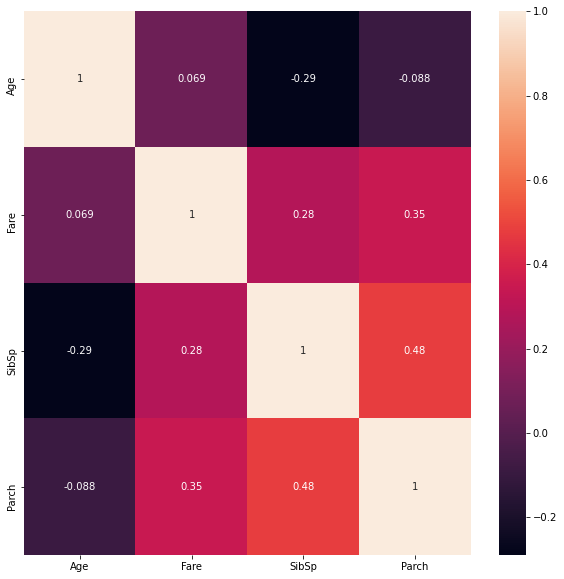

In [46]:
#died

plt.subplots(figsize = (10,10))
sns.heatmap(raw_df.loc[raw_df['Survived'] == 0][['Age','Fare','SibSp','Parch']].corr(), annot=True)

## Dummy Variables

In [64]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,-1


In [65]:
raw_df.shape

(891, 13)

In [66]:
int_df = raw_df

In [67]:
int_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,-1


In [68]:
raw_df.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
CA 2144       6
347088        6
             ..
PC 17318      1
C.A. 24579    1
17464         1
349214        1
330958        1
Name: Ticket, Length: 681, dtype: int64

In [69]:
#could probably find the commonality - i.e. group by 'A','B', etc.

raw_df.Cabin.value_counts()

-1             687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
E68              1
D30              1
A7               1
D45              1
C30              1
Name: Cabin, Length: 148, dtype: int64

In [70]:
raw_df.Embarked.value_counts()

S     644
C     168
Q      77
-1      2
Name: Embarked, dtype: int64

In [71]:
raw_df['Cabin_Check'] = raw_df.loc[~raw_df.Cabin.str.contains('-')].Cabin.str[0]

In [72]:
raw_df['Cabin_Check']=raw_df['Cabin_Check'].fillna('-1')

In [73]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S,-1


In [74]:
#many cabins are '-1'
raw_df.groupby(['Cabin_Check','Survived'])['PassengerId'].count()

Cabin_Check  Survived
-1           0           481
             1           206
A            0             8
             1             7
B            0            12
             1            35
C            0            24
             1            35
D            0             8
             1            25
E            0             8
             1            24
F            0             5
             1             8
G            0             2
             1             2
T            0             1
             1             0
Name: PassengerId, dtype: int64

In [75]:
#parse tickets

raw_df.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
CA 2144       6
347088        6
             ..
PC 17318      1
C.A. 24579    1
17464         1
349214        1
330958        1
Name: Ticket, Length: 681, dtype: int64

In [76]:
import string

string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [77]:
import re
pattern = re.compile("[A-Za-z]")
pattern

re.compile(r'[A-Za-z]', re.UNICODE)

In [78]:
raw_df.loc[(raw_df.Ticket.str.contains(pattern))]['Survived'].value_counts()

0    142
1     88
Name: Survived, dtype: int64

In [79]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [91]:
#instead of get dummies pivoting out, using category codes per column

dict(int_df.Sex.astype('category').cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [100]:
#Sex
sex_cat_dict = {x for x in zip(int_df.Sex, int_df.Sex.astype('category').cat.codes)}
sex_cat_dict

{('female', 0), ('male', 1)}

In [101]:
#Embarked
embarked_cat_dict = {x for x in zip(int_df.Embarked, int_df.Embarked.astype('category').cat.codes)}
embarked_cat_dict

{('-1', 0), ('C', 1), ('Q', 2), ('S', 3)}

In [58]:
##old way
#drop certain columns like Name, ticket
#need to encode Sex,embarked

#pd.concat([df1, df4], axis=1)

# int_df = pd.concat([int_df,pd.get_dummies(raw_df['Sex'])], axis = 1)
# int_df = pd.concat([int_df,pd.get_dummies(raw_df['Embarked'])], axis = 1)
# #int_df = pd.concat([int_df,pd.get_dummies(raw_df['Cabin_Check'])], axis = 1)


In [104]:
#using cat codes

int_df['Sex_Cat'] = int_df.Sex.astype('category').cat.codes
int_df['Embarked_Cat'] = int_df.Embarked.astype('category').cat.codes

In [106]:
final_df = int_df.drop(columns = {'Name','Ticket','Cabin','Embarked','Sex','PassengerId','Cabin_Check'})
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0,3,22.0,1,0,7.2500,1,3
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,0,3
4,0,3,35.0,0,0,8.0500,1,3


In [107]:
final_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Cat',
       'Embarked_Cat'],
      dtype='object')

### Dummy Variables to Test Df

In [39]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [109]:
test_int_df = test_df.copy()

In [40]:
#raw_df['Cabin_Check'] = raw_df.loc[~raw_df.Cabin.str.contains('-')].Cabin.str[0]

In [41]:
#raw_df['Cabin_Check']=raw_df['Cabin_Check'].fillna('-1')

In [42]:
#raw_df.head()

In [43]:
## OLD WAY

# test_int_df = pd.concat([test_df,pd.get_dummies(test_df['Sex'])], axis = 1)
# test_int_df = pd.concat([test_int_df,pd.get_dummies(test_df['Embarked'])], axis = 1)
# final_test_df = test_int_df.drop(columns = {'Name','Ticket','Cabin','Embarked','Sex','PassengerId'})

In [110]:
#using cat codes

test_int_df['Sex_Cat'] = test_int_df.Sex.astype('category').cat.codes
test_int_df['Embarked_Cat'] = test_int_df.Embarked.astype('category').cat.codes

In [111]:
final_test_df = test_int_df.drop(columns = {'Name','Ticket','Cabin','Embarked','Sex','PassengerId'})
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [44]:
#final_test_df['-1'] = 0

In [112]:
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [113]:
final_test_df.shape

(418, 7)

In [114]:
final_test_df.isna().any()

Pclass          False
Age              True
SibSp           False
Parch           False
Fare             True
Sex_Cat         False
Embarked_Cat    False
dtype: bool

In [115]:
final_test_df['Age'] = pd.DataFrame(imputer.fit_transform(final_test_df[['Age']]))

In [116]:
final_test_df['Fare'] = pd.DataFrame(imputer.fit_transform(final_test_df[['Fare']]))

In [117]:
#final_test_df['-1'] = 0

In [118]:
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [119]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0,3,22.0,1,0,7.2500,1,3
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,0,3
4,0,3,35.0,0,0,8.0500,1,3


## Modeling

### Model 1 - KNN

In [120]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0,3,22.0,1,0,7.2500,1,3
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,0,3
4,0,3,35.0,0,0,8.0500,1,3


In [121]:
#df. loc[:, df. columns != <column name>].

final_df.loc[:, final_df.columns != 'Survived']

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,22.000000,1,0,7.2500,1,3
1,1,38.000000,1,0,71.2833,0,1
2,3,26.000000,0,0,7.9250,0,3
3,1,35.000000,1,0,53.1000,0,3
4,3,35.000000,0,0,8.0500,1,3
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,3
887,1,19.000000,0,0,30.0000,0,3
888,3,29.699118,1,2,23.4500,0,3
889,1,26.000000,0,0,30.0000,1,1


In [122]:
final_df.dtypes

Survived        category
Pclass             int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Sex_Cat             int8
Embarked_Cat        int8
dtype: object

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = final_df.loc[:, final_df.columns != 'Survived']
y = final_df['Survived']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Print the accuracy
print(knn.score(X_test, y_test))


0.6815642458100558


In [124]:
X.shape

(891, 7)

In [125]:
y.shape

(891,)

In [126]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [127]:
len(y_test)

179

In [128]:
#prediction to the hold out set

knn.predict(final_test_df)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

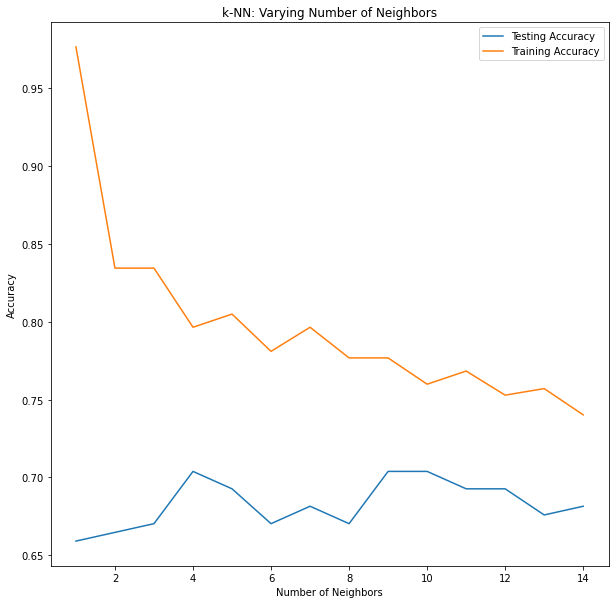

In [129]:
# Setup arrays to store train and test accuracies

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.subplots(figsize = (10,10))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [130]:
#grid search

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv =5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_


{'n_neighbors': 5}

In [65]:
#grid search and knn graph show 10 as best option

In [131]:
#cross validation

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_train, y_train, cv = 5, scoring = 'roc_auc')

array([0.73409091, 0.70764463, 0.75726228, 0.85837542, 0.78882576])

In [132]:
#cross validation

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_test, y_test, cv = 5, scoring = 'roc_auc')

array([0.62987013, 0.67694805, 0.68668831, 0.59253247, 0.63636364])

In [133]:
#avg

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_test, y_test, cv = 5, scoring = 'roc_auc').mean()

0.6444805194805194

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = final_df.loc[:, final_df.columns != 'Survived']
y = final_df['Survived']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Create a k-NN classifier with 10 neighbors: knn - most optimal
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Print the accuracy
print(knn.score(X_test, y_test))


0.7039106145251397


In [135]:
confusion_matrix = pd.crosstab(y_test,y_pred)
confusion_matrix

col_0,0,1
Survived,,
0,87,23
1,34,35


In [136]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [72]:
87 / (87+23)

0.7909090909090909

In [137]:
#precision - true negative rate (specificity) - instances predicted not survived correctly?

confusion_matrix.iloc[0,0] / (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1])

0.7909090909090909

In [138]:
87 / (87+34)

0.71900826446281

In [140]:
#recall - true positive rate (sensitivity) - how many survived that actually survived?

confusion_matrix.iloc[0,0] / (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0])

0.71900826446281

In [141]:
roc_auc_score(y_test, y_pred)

0.6490777338603425

### Model 2 - Decision Tree

In [173]:
# Import necessary modules
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train,y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 4}
Best score is 0.8104501132670145


In [174]:
tree_cv.score(X_test,y_test)

0.8100558659217877

In [175]:
#train model on best params

tree_best = DecisionTreeClassifier(criterion= 'gini',max_depth= 3, max_features= 5, min_samples_leaf= 4)
tree_best.fit(X_train, y_train)
tree_best.score(X_test, y_test)

0.8100558659217877

In [176]:
#predict off hold out set

predictions = tree_best.predict(final_test_df)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [177]:
test_df.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [178]:
pred_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':predictions})
pred_df = pred_df.set_index('PassengerId')

In [179]:
pred_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [84]:
pred_df.to_csv('Predictions_DT.csv')

In [85]:
#tree.plot_tree(tree_cv)

In [180]:
#feature importance - which ones may cause overfitting and worth removing?

tree_best.feature_importances_

array([0.21905019, 0.09075445, 0.00924145, 0.        , 0.04121701,
       0.63973689, 0.        ])

In [181]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
692,3,29.699118,0,0,56.4958,1,3
481,2,29.699118,0,0,0.0000,1,3
527,1,29.699118,0,0,221.7792,1,3
855,3,18.000000,0,1,9.3500,0,3
801,2,31.000000,1,1,26.2500,0,3
...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,2
258,1,35.000000,0,0,512.3292,0,1
736,3,48.000000,1,3,34.3750,0,3
462,1,47.000000,0,0,38.5000,1,3


In [182]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, tree_best.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [183]:
feat_dict

{'Sex_Cat': 0.6397368898487404,
 'Pclass': 0.2190501942206821,
 'Age': 0.09075445369823276,
 'Fare': 0.041217008771413294,
 'SibSp': 0.009241453460931448,
 'Parch': 0.0,
 'Embarked_Cat': 0.0}

In [184]:
feature_importance = pd.DataFrame({'Features':feat_dict.keys(),'Values':feat_dict.values()})
feature_importance

,Features,Values
0,Sex_Cat,0.639737
1,Pclass,0.219050
2,Age,0.090754
3,Fare,0.041217
4,SibSp,0.009241
5,Parch,0.000000
6,Embarked_Cat,0.000000


<AxesSubplot:xlabel='Features', ylabel='Values'>

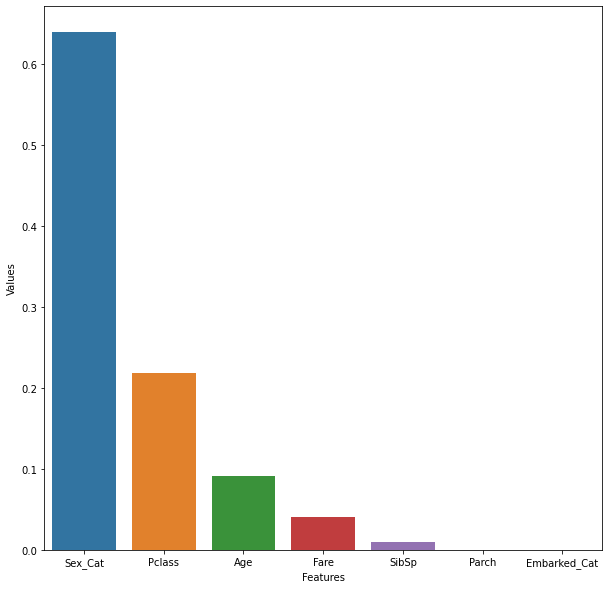

In [185]:
plt.subplots(figsize = (10,10))
sns.barplot(x = 'Features', y = 'Values', data = feature_importance)

In [165]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
692,3,29.699118,0,0,56.4958,1,3
481,2,29.699118,0,0,0.0000,1,3
527,1,29.699118,0,0,221.7792,1,3
855,3,18.000000,0,1,9.3500,0,3
801,2,31.000000,1,1,26.2500,0,3
...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,2
258,1,35.000000,0,0,512.3292,0,1
736,3,48.000000,1,3,34.3750,0,3
462,1,47.000000,0,0,38.5000,1,3


In [186]:
#choose best features for new model

X_train.iloc[:,np.r_[0,1,2,4,5]]

,Pclass,Age,SibSp,Fare,Sex_Cat
692,3,29.699118,0,56.4958,1
481,2,29.699118,0,0.0000,1
527,1,29.699118,0,221.7792,1
855,3,18.000000,0,9.3500,0
801,2,31.000000,1,26.2500,0
...,...,...,...,...,...
359,3,29.699118,0,7.8792,0
258,1,35.000000,0,512.3292,0
736,3,48.000000,1,34.3750,0
462,1,47.000000,0,38.5000,1


#### Feature Importance - Revised Model

In [187]:
# Import necessary modules
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.816113464000788


In [188]:
#train model on best params

tree_best = DecisionTreeClassifier(criterion= 'entropy',max_depth= None, max_features= 4, min_samples_leaf= 4)
tree_best.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)
tree_best.score(X_test.iloc[:,np.r_[0,1,2,4,5]], y_test)

0.8044692737430168

In [191]:
final_test_df.iloc[:,np.r_[0,1,2,4,5]]

,Pclass,Age,SibSp,Fare,Sex_Cat
0,3,34.50000,0,7.8292,1
1,3,47.00000,1,7.0000,0
2,2,62.00000,0,9.6875,1
3,3,27.00000,0,8.6625,1
4,3,22.00000,1,12.2875,0
...,...,...,...,...,...
413,3,30.27259,0,8.0500,1
414,1,39.00000,0,108.9000,0
415,3,38.50000,0,7.2500,1
416,3,30.27259,0,8.0500,1


In [193]:
#predict off hold out set

predictions_revised_tree = tree_best.predict(final_test_df.iloc[:,np.r_[0,1,2,4,5]])
predictions_revised_tree

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [177]:
test_df.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [194]:
pred_revised_tree_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':predictions_revised_tree})
pred_revised_tree_df = pred_revised_tree_df.set_index('PassengerId')

In [195]:
pred_revised_tree_df.to_csv('pred_revised_tree_df.csv')

#### XGBoost

In [196]:
#scale training data

scaler = MinMaxScaler()
scaler.fit(X_train.iloc[:,np.r_[0,1,2,4,5]])
scaled_train_data = scaler.transform(X_train.iloc[:,np.r_[0,1,2,4,5]])

In [197]:
#scale test data

scaler = MinMaxScaler()
scaler.fit(X_test.iloc[:,np.r_[0,1,2,4,5]])
scaled_test_data = scaler.transform(X_test.iloc[:,np.r_[0,1,2,4,5]])

In [198]:
# #after scaling data run xgboost

# xgb_best = xgb.XGBClassifier(max_depth = 3)
# xgb_best.fit(scaled_train_data,y_train)
# xgb_best.score(scaled_test_data, y_test)


In [199]:
# learning_rate: 0.01
# n_estimators: 100 if the size of your data is high, 1000 is if it is medium-low
# max_depth: 3
# subsample: 0.8
# colsample_bytree: 1
# gamma: 1

In [200]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [201]:
#xgb_classifier = xgb.XGBClassifier()

In [203]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"learning_rate":np.arange(.01,.1,.01),
                "max_depth": [3, None],
              "n_estimators": randint(0, 100),
               "subsample" : np.arange(.8,1,0.1),
              "colsample_bytree" :  np.arange(.8,1,0.1),
              "gamma" :[0,1,5]
             }
# Instantiate a Decision Tree classifier: tree
xgb_classifier = xgb.XGBClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
xgb_cv = RandomizedSearchCV(xgb_classifier, param_dist, cv=5)
xgb_cv.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)

print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Decision Tree Parameters: {'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.09, 'max_depth': None, 'n_estimators': 47, 'subsample': 0.8}
Best score is 0.8287796710331922


In [204]:
#train model on best params

xgb_best = xgb.XGBClassifier(learning_rate=0.09,
 n_estimators =47,
 max_depth = None,
 subsample = 0.8,
 colsample_bytree = .9,
 gamma= 1)
xgb_best.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)
xgb_best.score(X_test.iloc[:,np.r_[0,1,2,4,5]], y_test)

0.7932960893854749

In [208]:
y_pred_xgb = xgb_best.predict(X_test.iloc[:,np.r_[0,1,2,4,5]])
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [209]:
pd.crosstab(y_test, y_pred_xgb)

col_0,0,1
Survived,,
0,98,12
1,25,44


In [210]:
#recall - true positive rate

98 /(98+12)

0.8909090909090909

In [211]:
#precision - true negative rate

98/(98+25)

0.7967479674796748

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



In [214]:
xgb_holdout_predictions = xgb_best.predict(final_test_df.iloc[:,np.r_[0,1,2,4,5]])

In [215]:
pred_xgb_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':xgb_holdout_predictions})
pred_xgb_df = pred_xgb_df.set_index('PassengerId')
pred_xgb_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [216]:
pred_xgb_df.to_csv('xgboost_predictions_2_21.csv')

### Model 3 - Log Regression

In [217]:
#plot binomial distribution
#change .5 cutoff

In [218]:
c_space = np.logspace(-5, 8, 2)
c_space

array([1.e-05, 1.e+08])

In [220]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 5)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter = 1000)
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7865359992120555


In [221]:
logreg = LogisticRegression(max_iter = 1000, C= 31.622776601683793)
# Instantiate the GridSearchCV object: logreg_cv

logreg.fit(X_train.iloc[:,np.r_[0,1,2,4,5]],y_train)
logreg.score(X_test.iloc[:,np.r_[0,1,2,4,5]], y_test)

0.8156424581005587

In [224]:
y_pred_log = logreg.predict(X_test.iloc[:,np.r_[0,1,2,4,5]])

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



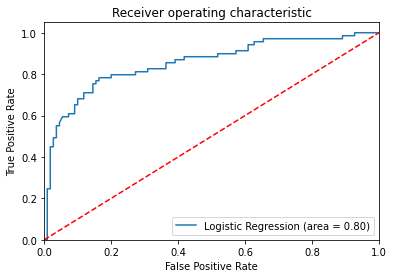

In [226]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.iloc[:,np.r_[0,1,2,4,5]]))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.iloc[:,np.r_[0,1,2,4,5]])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model 4 - SVM

In [120]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 5)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
svm = svm.SVC()
# Instantiate the GridSearchCV object: logreg_cv
#svm_clf = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
svm.fit(X_train.iloc[:,np.r_[0:5,6,-1]],y_train)
svm.score(X_test.iloc[:,np.r_[0:5,6,-1]], y_test)


0.6201117318435754

### Clustering

In [ ]:
#should be off total data set (final_df) and not X_train

In [ ]:
#what about categorical features?

In [ ]:
#split data into train and test after adding cluster labels to final_df_cluster

In [ ]:
#remove some of the feature that worked well in xgboost

In [ ]:
#fit model and predict to see if cluster had better impact

In [227]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0,3,22.0,1,0,7.2500,1,3
1,1,1,38.0,1,0,71.2833,0,1
2,1,3,26.0,0,0,7.9250,0,3
3,1,1,35.0,1,0,53.1000,0,3
4,0,3,35.0,0,0,8.0500,1,3


In [241]:
final_df.shape

(891, 8)

In [242]:
final_df_cluster = final_df.copy()

In [243]:
y_survived_cluster = final_df_cluster['Survived']

In [246]:
final_df_cluster = final_df_cluster.drop(columns = {'Survived'}, axis = 1)

In [247]:
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,22.0,1,0,7.2500,1,3
1,1,38.0,1,0,71.2833,0,1
2,3,26.0,0,0,7.9250,0,3
3,1,35.0,1,0,53.1000,0,3
4,3,35.0,0,0,8.0500,1,3


In [248]:
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [251]:
#scale data - change to min max scaler since not normally distributed

scaler = MinMaxScaler()
scaler.fit(final_df_cluster)
scaled_data = scaler.transform(final_df_cluster)

In [284]:
#scale hold out data


scaler = MinMaxScaler()
scaler.fit(final_test_df)
scaled_data_holdout = scaler.transform(final_test_df)

In [252]:
scaled_data

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.50244517,
         0.73769513,  0.58796609],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.78684529,
        -1.35557354, -1.91264387],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48885426,
        -1.35557354,  0.58796609],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.17626324,
        -1.35557354,  0.58796609],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.04438104,
         0.73769513, -1.91264387],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.49237783,
         0.73769513, -0.66233889]])

In [285]:
scaled_data_holdout

array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -0.49840706,
         0.75592895, -0.47091535],
       [ 0.87348191,  1.32553003,  0.61699237, ..., -0.51327429,
        -1.32287566,  0.70076689],
       [-0.31581919,  2.51417495, -0.49947002, ..., -0.46508846,
         0.75592895, -0.47091535],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ..., -0.50879189,
         0.75592895,  0.70076689],
       [ 0.87348191,  0.        , -0.49947002, ..., -0.4944482 ,
         0.75592895,  0.70076689],
       [ 0.87348191,  0.        ,  0.61699237, ..., -0.23790598,
         0.75592895, -1.64259759]])

C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

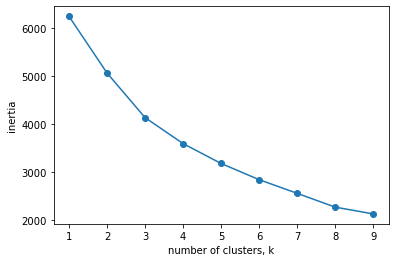

In [253]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [254]:
model_kmeans = KMeans(n_clusters = 2)
labels = model_kmeans.fit_predict(scaled_data)
#df_kmeans = pd.DataFrame({'labels':labels, 'varieties':varieties})

C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rossd\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [289]:
#predict clusters on hold out data set
labels_holdout = model_kmeans.predict(scaled_data_holdout)

In [255]:
final_df_cluster['cluster'] = labels

In [256]:
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat,cluster
0,3,22.0,1,0,7.2500,1,3,1
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,3,1
3,1,35.0,1,0,53.1000,0,3,0
4,3,35.0,0,0,8.0500,1,3,1


In [290]:
final_test_df['cluster'] = labels_holdout
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat,cluster
0,3,34.5,0,0,7.8292,1,1,1
1,3,47.0,1,0,7.0000,0,2,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,2,1
4,3,22.0,1,1,12.2875,0,2,1


In [291]:
final_test_df.cluster.value_counts().sort_index()

0    114
1    304
Name: cluster, dtype: int64

In [292]:
final_df_cluster.cluster.value_counts().sort_index()

0    236
1    655
Name: cluster, dtype: int64

In [300]:
pd.crosstab(final_df_cluster.cluster, y_survived_cluster)

Survived,0,1
cluster,,
0,91,145
1,458,197


In [258]:
final_df_cluster.groupby('cluster')['Pclass'].value_counts()

cluster  Pclass
0        1         216
         2          20
1        3         491
         2         164
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Pclass'>

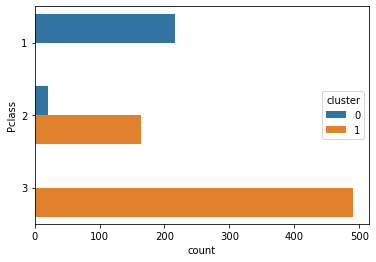

In [260]:
sns.countplot(y = 'Pclass', hue = 'cluster', data = final_df_cluster)

#### xgboost after clustering

In [337]:
final_df_cluster

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat,cluster
0,3,22.000000,1,0,7.2500,1,3,1
1,1,38.000000,1,0,71.2833,0,1,0
2,3,26.000000,0,0,7.9250,0,3,1
3,1,35.000000,1,0,53.1000,0,3,0
4,3,35.000000,0,0,8.0500,1,3,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,3,1
887,1,19.000000,0,0,30.0000,0,3,0
888,3,29.699118,1,2,23.4500,0,3,1
889,1,26.000000,0,0,30.0000,1,1,0


In [338]:
y_survived_cluster

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [339]:
final_df_cluster.iloc[:,np.r_[0,1,2,4,5,-1]]

,Pclass,Age,SibSp,Fare,Sex_Cat,cluster
0,3,22.000000,1,7.2500,1,1
1,1,38.000000,1,71.2833,0,0
2,3,26.000000,0,7.9250,0,1
3,1,35.000000,1,53.1000,0,0
4,3,35.000000,0,8.0500,1,1
...,...,...,...,...,...,...
886,2,27.000000,0,13.0000,1,1
887,1,19.000000,0,30.0000,0,0
888,3,29.699118,1,23.4500,0,1
889,1,26.000000,0,30.0000,1,0


In [353]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = final_df_cluster
y = y_survived_cluster
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [355]:
#scale training data

scaler = MinMaxScaler()
scaler.fit(X_train.iloc[:,np.r_[0,1,2,4,5,-1]])
scaled_train_data = scaler.transform(X_train.iloc[:,np.r_[0,1,2,4,5,-1]])

In [356]:
#scale test data

scaler = MinMaxScaler()
scaler.fit(X_test.iloc[:,np.r_[0,1,2,4,5,-1]])
scaled_test_data = scaler.transform(X_test.iloc[:,np.r_[0,1,2,4,5,-1]])

In [357]:
final_test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat,cluster
0,3,34.50000,0,0,7.8292,1,1,1
1,3,47.00000,1,0,7.0000,0,2,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,2,1
4,3,22.00000,1,1,12.2875,0,2,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,2,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,2,1
416,3,30.27259,0,0,8.0500,1,2,1


In [358]:
#scale hold out

scaler = MinMaxScaler()
scaler.fit(final_test_df.iloc[:,np.r_[0,1,2,4,5,-1]])
scaled_holdout_data = scaler.transform(final_test_df.iloc[:,np.r_[0,1,2,4,5,-1]])

In [271]:
# #after scaling data run xgboost

# xgb_best = xgb.XGBClassifier(max_depth = 3)
# xgb_best.fit(scaled_train_data,y_train)
# xgb_best.score(scaled_test_data, y_test)


In [272]:
# learning_rate: 0.01
# n_estimators: 100 if the size of your data is high, 1000 is if it is medium-low
# max_depth: 3
# subsample: 0.8
# colsample_bytree: 1
# gamma: 1

In [346]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [347]:
#xgb_classifier = xgb.XGBClassifier()

In [348]:
scaled_train_data

array([[1.        , 0.36792055, 0.        , 0.11027246, 1.        ],
       [0.5       , 0.36792055, 0.        , 0.        , 1.        ],
       [0.        , 0.36792055, 0.        , 0.43288417, 1.        ],
       ...,
       [1.        , 0.59788892, 0.125     , 0.06709553, 0.        ],
       [0.        , 0.58532295, 0.        , 0.075147  , 1.        ],
       [0.        , 0.36792055, 0.        , 0.05182215, 1.        ]])

In [350]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"learning_rate":np.arange(.01,.1,.01),
                "max_depth": [3, None],
              "n_estimators": randint(0, 100),
               "subsample" : np.arange(.8,1,0.1),
              "colsample_bytree" :  np.arange(.8,1,0.1),
              "gamma" :[0,1,5]
             }
# Instantiate a Decision Tree classifier: tree
xgb_classifier = xgb.XGBClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
xgb_cv = RandomizedSearchCV(xgb_classifier, param_dist, cv=5)
xgb_cv.fit(scaled_train_data,y_train)

print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Decision Tree Parameters: {'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': None, 'n_estimators': 86, 'subsample': 0.8}
Best score is 0.8287698217275683


In [328]:
#train model on best params

xgb_best = xgb.XGBClassifier(learning_rate=0.09,
 n_estimators =69,
 max_depth = None,
 subsample = 0.9,
 colsample_bytree = .9,
 gamma= 1)
xgb_best.fit(scaled_train_data,y_train)
xgb_best.score(scaled_test_data, y_test)

0.8212290502793296

In [329]:
y_pred_xgb = xgb_best.predict(scaled_test_data)
y_pred_xgb

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [330]:
pd.crosstab(y_test, y_pred_xgb)

col_0,0,1
Survived,,
0,101,9
1,23,46


In [310]:
#recall - true positive rate

101 /(101+9)

0.9181818181818182

In [331]:
#precision - true negative rate

101/(101+23)

0.8145161290322581

In [332]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [313]:
final_test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat,cluster
0,3,34.50000,0,0,7.8292,1,1,1
1,3,47.00000,1,0,7.0000,0,2,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,2,1
4,3,22.00000,1,1,12.2875,0,2,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,2,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,2,1
416,3,30.27259,0,0,8.0500,1,2,1


In [333]:
xgb_holdout_predictions_cluster2 = xgb_best.predict(scaled_holdout_data)

In [335]:
pred_xgb_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':xgb_holdout_predictions_cluster2})
pred_xgb_df = pred_xgb_df.set_index('PassengerId')
pred_xgb_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [336]:
pred_xgb_df.to_csv('xgboost_predictions_cluster_2_21_v2.csv')

#### Xgboost Tuned

In [352]:
scaled_train_data, scaled_test_data, scaled_holdout_data

(array([[1.        , 0.36792055, 0.        , 0.11027246, 1.        ],
        [0.5       , 0.36792055, 0.        , 0.        , 1.        ],
        [0.        , 0.36792055, 0.        , 0.43288417, 1.        ],
        ...,
        [1.        , 0.59788892, 0.125     , 0.06709553, 0.        ],
        [0.        , 0.58532295, 0.        , 0.075147  , 1.        ],
        [0.        , 0.36792055, 0.        , 0.05182215, 1.        ]]),
 array([[1.        , 0.33574007, 0.25      , 0.04713766, 1.        ],
        [1.        , 0.62454874, 0.        , 0.03142511, 1.        ],
        [1.        , 0.30685921, 0.        , 0.01410226, 1.        ],
        [1.        , 0.58122744, 0.25      , 0.02753757, 1.        ],
        [1.        , 0.4180378 , 0.125     , 0.03025399, 0.        ],
        [1.        , 0.50902527, 0.125     , 0.03396254, 0.        ],
        [0.5       , 0.50902527, 0.        , 0.02537431, 0.        ],
        [0.        , 0.63898917, 0.        , 0.05182215, 1.        ],
     

In [362]:
from xgboost import XGBClassifier

params = {'objective':'binary:logistic',
          'booster':'gbtree',
         'max_depth': 4,
         'alpha': 10,
         'learning_rate': 1.0,
         'n_estimators': 100}

In [363]:
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(scaled_train_data, y_train)

XGBClassifier(alpha=10, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [364]:
y_pred_xgb_class = xgb_clf.predict(scaled_test_data)

In [365]:
pd.crosstab(y_pred_xgb_class, y_test)

Survived,0,1
row_0,,
0,101,28
1,9,41


In [367]:
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb_class)))

XGBoost model accuracy score: 0.7933


In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_class))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       110
           1       0.82      0.59      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



In [369]:
101/110

0.9181818181818182

In [377]:
xgb_classifier_holdout_predictions = xgb_clf.predict(scaled_holdout_data)

In [378]:
pred_xgb_class_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':xgb_classifier_holdout_predictions})
pred_xgb_class_df = pred_xgb_class_df.set_index('PassengerId')
pred_xgb_class_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [379]:
pred_xgb_class_df.to_csv('xgboost_classifier_pred_2_22.csv')

#### XGB Classifier CV

In [396]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"objective": ["binary:logistic"],
              "booster":["gbtree"],
                "learning_rate":np.arange(.01,.1,.01),
                "max_depth": [1,2,3, None],
              "n_estimators": randint(0, 500),
               "subsample" : np.arange(.1,1,0.1),
              "colsample_bytree" :  np.arange(.1,1,0.1),
              "gamma" :[0,1,5]
             }
# Instantiate a Decision Tree classifier: tree
xgb_classifier = xgb.XGBClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
xgb_cv = RandomizedSearchCV(xgb_classifier, param_dist, cv=50)
xgb_cv.fit(scaled_train_data,y_train)

print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Decision Tree Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 365, 'objective': 'binary:logistic', 'subsample': 0.30000000000000004}
Best score is 0.8263809523809524


In [387]:
data_dmatrix = xgb.DMatrix(data=scaled_train_data,label=y_train)

In [388]:
from xgboost import cv
xgb_cv_2 = cv(dtrain=data_dmatrix, params=xgb_cv.best_params_, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [392]:
xgb_cv_2.head(100)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.636746,0.016441,0.637896,0.033659
1,0.767469,0.042215,0.759796,0.053584
2,0.830950,0.021232,0.794692,0.071408
3,0.847412,0.018492,0.790214,0.085260
4,0.847860,0.025665,0.794434,0.081780
5,0.867847,0.023785,0.803866,0.071695
6,0.861821,0.024031,0.800133,0.064473
7,0.859081,0.028628,0.798565,0.063312
8,0.857352,0.031688,0.798837,0.066471
9,0.852279,0.030345,0.795234,0.066703


In [398]:
xgb_best = xgb.XGBClassifier(**xgb_cv.best_params_)
xgb_best.fit(scaled_train_data,y_train)
xgb_best.score(scaled_test_data, y_test)

0.8100558659217877

In [414]:
xgb_best_pred = xgb_best.predict(scaled_test_data)

In [415]:
pd.crosstab(xgb_best_pred, y_test)

Survived,0,1
row_0,,
0,99,23
1,11,46


In [404]:
X_train.iloc[:,np.r_[0,1,2,4,5,-1]]

,Pclass,Age,SibSp,Fare,Sex_Cat,cluster
692,3,29.699118,0,56.4958,1,1
481,2,29.699118,0,0.0000,1,1
527,1,29.699118,0,221.7792,1,0
855,3,18.000000,0,9.3500,0,1
801,2,31.000000,1,26.2500,0,1
...,...,...,...,...,...,...
359,3,29.699118,0,7.8792,0,1
258,1,35.000000,0,512.3292,0,0
736,3,48.000000,1,34.3750,0,1
462,1,47.000000,0,38.5000,1,0


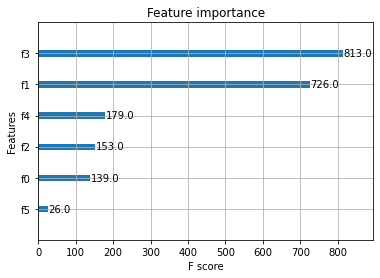

In [408]:
xgb.plot_importance(xgb_best)
plt.rcParams['figure.figsize'] = [5,5]
#plt.set_ylabels = ['1','2','3','4','5']
plt.show()

In [412]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

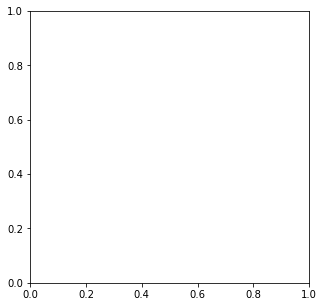

In [413]:
import matplotlib.pyplot as plt

xgb.plot_tree(xgb_best,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

#### Decision Tree

### KModes Clustering

In [ ]:
#must take out survived so matches raw df

In [230]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [53]:
from kmodes.kprototypes import KPrototypes

In [54]:
final_df_cluster = final_df.copy()

In [55]:
final_df_cluster.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,-1,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [56]:
final_df_cluster = final_df_cluster.iloc[:,np.r_[1:6,7,8,9,10,11]]
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S
0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,0,1


In [57]:
categorical_features_idx = [0, 2, 3, 5,6,7,8,9]

In [58]:
mark_array=final_df_cluster.values

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 2374948.695716772
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 29, ncost: 1051510.6130173323
Run: 1, iteration: 2/100, moves: 16, ncost: 1022625.4372138319
Run: 1, iteration: 3/100, moves: 0, ncost: 1022625.4372138319
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 93, ncost: 645430.3994923399
Run: 1, iteration: 2/100, moves: 17, ncost: 596510.3569114417
Run: 1, iteration: 3/100, moves: 12, ncost: 569893.4544828271
Run: 1, iteration: 4/100, moves: 2, ncost: 569851.5009212018
Run: 1, iteration: 5/100, moves: 0, 

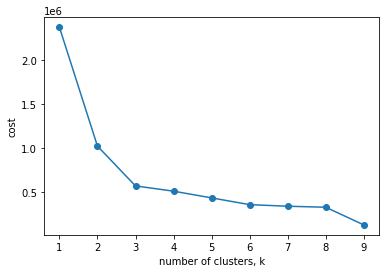

In [59]:
ks = range(1, 10)
cost = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KPrototypes(n_clusters=k, init = "Cao", n_init = 1, verbose=1).fit(mark_array, categorical=categorical_features_idx)
    
    # Append the inertia to the list of inertias
    #print(kproto.cluster_centroids_)
    cost.append(model.cost_)
    
# Plot ks vs cost
plt.plot(ks, cost, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('cost')
plt.xticks(ks)
plt.show()

In [60]:
#4 cluters

km_cao = KPrototypes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 309, ncost: 823898.9049897494
Run: 1, iteration: 2/100, moves: 172, ncost: 611097.5736718153
Run: 1, iteration: 3/100, moves: 78, ncost: 537010.4481691212
Run: 1, iteration: 4/100, moves: 17, ncost: 510233.2541353868
Run: 1, iteration: 5/100, moves: 3, ncost: 510140.48674049746
Run: 1, iteration: 6/100, moves: 0, ncost: 510140.48674049746


In [61]:
#add clusters to dataset

final_df_cluster['cluster'] = fitClusters_cao

In [62]:
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster
0,3,22.0,1,0,7.2500,1,0,0,0,1,3
1,1,38.0,1,0,71.2833,0,0,1,0,0,2
2,3,26.0,0,0,7.9250,0,0,0,0,1,3
3,1,35.0,1,0,53.1000,0,0,0,0,1,2
4,3,35.0,0,0,8.0500,1,0,0,0,1,1


In [63]:
#check clusters

final_df_cluster.cluster.value_counts().sort_index()

0     20
1    455
2    141
3    275
Name: cluster, dtype: int64

In [64]:
final_df_cluster.groupby('cluster')['Pclass'].value_counts()

cluster  Pclass
0        1          20
1        3         270
         2         115
         1          70
2        1         120
         3          14
         2           7
3        3         207
         2          62
         1           6
Name: Pclass, dtype: int64

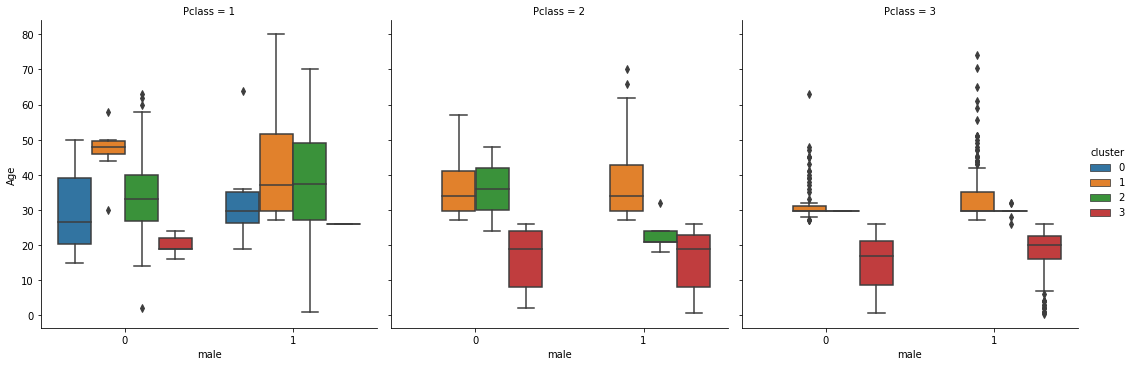

In [65]:
#sns.catplot(x = 'day', y = 'total_bill',  kind = 'box', data = tips, hue = 'sex', dodge = False)
sns.catplot(x = 'male', y = 'Age', kind = 'box', data = final_df_cluster, col = 'Pclass', hue = 'cluster')

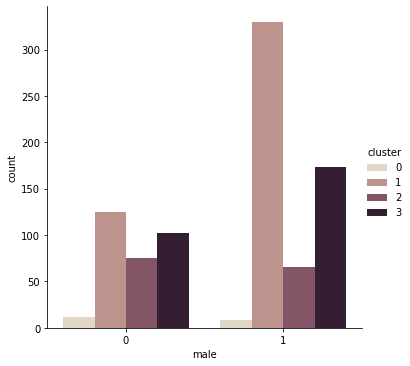

In [66]:
sns.catplot(x = 'male', kind = 'count', palette = 'ch:0.25', data = final_df_cluster, hue = 'cluster')

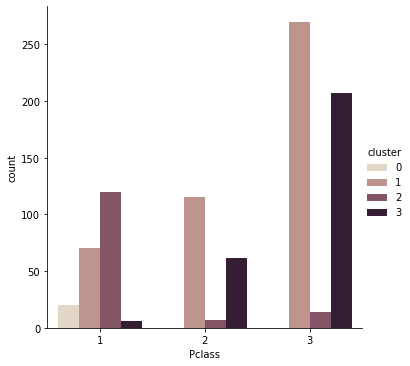

In [67]:
sns.catplot(x = 'Pclass', kind = 'count', palette = 'ch:0.25', data = final_df_cluster, hue = 'cluster')

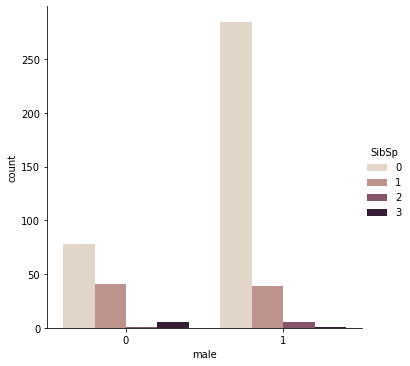

In [68]:
sns.catplot(x = 'male', kind = 'count', palette = 'ch:0.25', data = final_df_cluster.loc[final_df_cluster.cluster == 1], hue = 'SibSp')

In [69]:
#fit predict to the test set

In [70]:
#4 cluters

# km_cao = KPrototypes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
# fitClusters_cao = km_cao.fit_predict(mark_array, categorical=categorical_features_idx)

In [71]:
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,-1
0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0


In [72]:
final_test_df2 = final_test_df.iloc[:,np.r_[0:5,6,7,8,9,10]]
final_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,-1
0,3,34.5,0,0,7.8292,1,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,0,1,0


In [73]:
categorical_features_idx_test = [0, 2, 3, 5,6,7,8,9]

In [74]:
mark_array_test=final_test_df2.values

In [75]:
km_cao.predict(mark_array_test, categorical=categorical_features_idx_test)

array([1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3,
       1, 2, 0, 1, 2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 3, 2, 1, 1, 1, 1,
       2, 3, 1, 1, 2, 1, 2, 1, 3, 0, 1, 3, 1, 3, 1, 0, 3, 1, 3, 3, 0, 1,
       3, 1, 1, 0, 3, 3, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 0, 3, 1, 3, 2, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 3, 2, 0, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1,
       3, 3, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 2, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 2, 1, 2, 1, 2, 2, 1, 0, 1, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2, 3,
       3, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1,
       1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 2, 3, 2, 3, 3, 2, 1, 1,
       2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1,

In [76]:
final_test_df2['cluster'] = km_cao.predict(mark_array_test, categorical=categorical_features_idx_test)

In [77]:
#check new test set

final_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,-1,cluster
0,3,34.5,0,0,7.8292,1,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,0,1,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,0,1
3,3,27.0,0,0,8.6625,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,0,3


In [78]:
#KNN back to predict how well clusters are defined

In [79]:
#add final_df survived column to final_df-cluster

In [80]:
final_df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [81]:
final_df_cluster['Survived'] = final_df.Survived

In [82]:
#check

In [83]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,-1,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [84]:
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster,Survived
0,3,22.0,1,0,7.2500,1,0,0,0,1,3,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,2,1
2,3,26.0,0,0,7.9250,0,0,0,0,1,3,1
3,1,35.0,1,0,53.1000,0,0,0,0,1,2,1
4,3,35.0,0,0,8.0500,1,0,0,0,1,1,0


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = final_df_cluster.loc[:, final_df_cluster.columns != 'Survived']
y = final_df_cluster['Survived']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Print the accuracy
print(knn.score(X_test, y_test))

0.6759776536312849


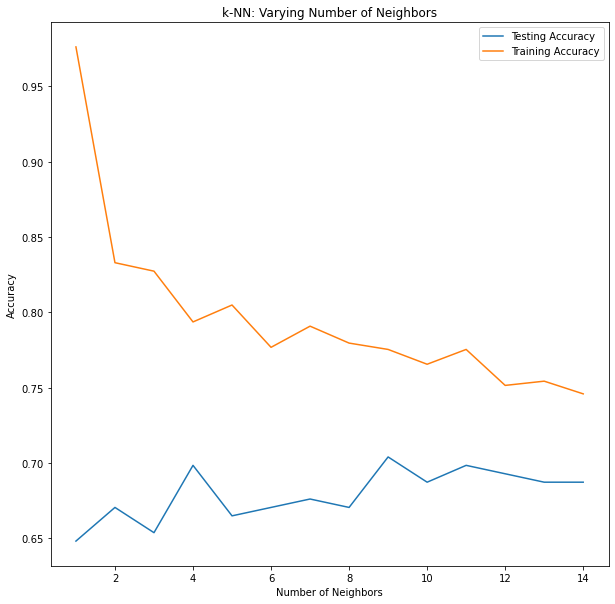

In [86]:
# Setup arrays to store train and test accuracies

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.subplots(figsize = (10,10))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [87]:
#grid search

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv =5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_


{'n_neighbors': 10}

In [412]:
#grid search and knn graph show 10 as best option

In [88]:
#cross validation

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_train, y_train, cv = 5, scoring = 'roc_auc')

array([0.7338843 , 0.69555785, 0.75287356, 0.85069444, 0.7756734 ])

In [89]:
#cross validation

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_test, y_test, cv = 5, scoring = 'roc_auc')

array([0.60227273, 0.68181818, 0.67694805, 0.59902597, 0.6520979 ])

In [90]:
#avg

cross_val_score(KNeighborsClassifier(n_neighbors = 10), X_test, y_test, cv = 5, scoring = 'roc_auc').mean()

0.6424325674325675

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create feature and target arrays
X = final_df_cluster.loc[:, final_df_cluster.columns != 'Survived']
y = final_df_cluster['Survived']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Create a k-NN classifier with 10 neighbors: knn - most optimal
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Print the accuracy
print(knn.score(X_test, y_test))


0.6871508379888268


In [93]:
y_pred_knn = knn.predict(X_test)

In [94]:
confusion_matrix = pd.crosstab(y_test,y_pred_knn)
confusion_matrix

col_0,0,1
Survived,,
0,92,18
1,38,31


In [95]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [96]:
98 / (98+12)

0.8909090909090909

In [97]:
#precision - true negative rate (specificity) - instances predicted not survived correctly?

confusion_matrix.iloc[0,0] / (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1])

0.8363636363636363

In [98]:
98 / (98+23)

0.8099173553719008

In [99]:
#recall - true positive rate (sensitivity) - how many survived that actually survived?

confusion_matrix.iloc[0,0] / (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0])

0.7076923076923077

In [100]:
roc_auc_score(y_test, y_pred_knn)

0.6428194993412385

In [ ]:
#predict off knn

In [101]:
final_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,-1,cluster
0,3,34.5,0,0,7.8292,1,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,0,1,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,0,1
3,3,27.0,0,0,8.6625,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,0,3


In [102]:
final_df_cluster.head()

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster,Survived
0,3,22.0,1,0,7.2500,1,0,0,0,1,3,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,2,1
2,3,26.0,0,0,7.9250,0,0,0,0,1,3,1
3,1,35.0,1,0,53.1000,0,0,0,0,1,2,1
4,3,35.0,0,0,8.0500,1,0,0,0,1,1,0


In [103]:
final_df_cluster.shape

(891, 12)

In [104]:
final_test_df2.head()

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,-1,cluster
0,3,34.5,0,0,7.8292,1,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,0,1,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,0,1
3,3,27.0,0,0,8.6625,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1,0,3


In [432]:
knn_predictions = knn.predict(final_test_df2)

In [433]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [434]:
knn_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':knn_predictions})
knn_df = knn_df.set_index('PassengerId')
knn_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [435]:
knn_df.to_csv('knn_predictions.csv')

#### XGBoost - After KMode

In [437]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster
692,3,29.699118,0,0,56.4958,1,0,0,0,1,1
481,2,29.699118,0,0,0.0000,1,0,0,0,1,0
527,1,29.699118,0,0,221.7792,1,0,0,0,1,2
855,3,18.000000,0,1,9.3500,0,0,0,0,1,0
801,2,31.000000,1,1,26.2500,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,0,0,1,0,0
258,1,35.000000,0,0,512.3292,0,0,1,0,0,2
736,3,48.000000,1,3,34.3750,0,0,0,0,1,1
462,1,47.000000,0,0,38.5000,1,0,0,0,1,1


In [105]:
X_train.iloc[:,np.r_[0:6,6,-1,-2]]

,Pclass,Age,SibSp,Parch,Fare,male,-1,cluster,S
692,3,29.699118,0,0,56.4958,1,0,2,1
481,2,29.699118,0,0,0.0000,1,0,1,1
527,1,29.699118,0,0,221.7792,1,0,0,1
855,3,18.000000,0,1,9.3500,0,0,3,1
801,2,31.000000,1,1,26.2500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,0,1,0
258,1,35.000000,0,0,512.3292,0,0,0,0
736,3,48.000000,1,3,34.3750,0,0,1,1
462,1,47.000000,0,0,38.5000,1,0,1,1


In [205]:
final_df_cluster.shape

(891, 13)

In [442]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster
692,3,29.699118,0,0,56.4958,1,0,0,0,1,1
481,2,29.699118,0,0,0.0000,1,0,0,0,1,0
527,1,29.699118,0,0,221.7792,1,0,0,0,1,2
855,3,18.000000,0,1,9.3500,0,0,0,0,1,0
801,2,31.000000,1,1,26.2500,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,0,0,1,0,0
258,1,35.000000,0,0,512.3292,0,0,1,0,0,2
736,3,48.000000,1,3,34.3750,0,0,0,0,1,1
462,1,47.000000,0,0,38.5000,1,0,0,0,1,1


In [468]:
y_train

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: category
Categories (2, int64): [0, 1]

In [106]:
#scale training X data

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_train_data = scaler.transform(X_train)

In [107]:
#scale test data

scaler = MinMaxScaler()
scaler.fit(X_test)
scaled_test_data = scaler.transform(X_test)

In [114]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster
692,3,29.699118,0,0,56.4958,1,0,0,0,1,2
481,2,29.699118,0,0,0.0000,1,0,0,0,1,1
527,1,29.699118,0,0,221.7792,1,0,0,0,1,0
855,3,18.000000,0,1,9.3500,0,0,0,0,1,3
801,2,31.000000,1,1,26.2500,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
359,3,29.699118,0,0,7.8792,0,0,0,1,0,1
258,1,35.000000,0,0,512.3292,0,0,1,0,0,0
736,3,48.000000,1,3,34.3750,0,0,0,0,1,1
462,1,47.000000,0,0,38.5000,1,0,0,0,1,1


In [110]:
final_test_df2

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,-1,cluster
0,3,34.50000,0,0,7.8292,1,0,1,0,0,1
1,3,47.00000,1,0,7.0000,0,0,0,1,0,1
2,2,62.00000,0,0,9.6875,1,0,1,0,0,1
3,3,27.00000,0,0,8.6625,1,0,0,1,0,1
4,3,22.00000,1,1,12.2875,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,1,0,1
414,1,39.00000,0,0,108.9000,0,1,0,0,0,2
415,3,38.50000,0,0,7.2500,1,0,0,1,0,1
416,3,30.27259,0,0,8.0500,1,0,0,1,0,1


In [115]:
#scale hold out data

scaler = MinMaxScaler()
scaler.fit(final_test_df2)
scaled_holdout_data = scaler.transform(final_test_df2)

In [116]:
scaled_holdout_data

array([[1.        , 0.4527232 , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [1.        , 0.61756561, 0.125     , ..., 1.        , 0.        ,
        0.33333333],
       [0.5       , 0.8153765 , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [1.        , 0.50547277, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [1.        , 0.39697468, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [1.        , 0.39697468, 0.125     , ..., 0.        , 0.        ,
        0.33333333]])

In [99]:
# #after scaling data run xgboost

# xgb_best = xgb.XGBClassifier(max_depth = 3)
# xgb_best.fit(scaled_train_data,y_train)
# xgb_best.score(scaled_test_data, y_test)


In [100]:
# learning_rate: 0.01
# n_estimators: 100 if the size of your data is high, 1000 is if it is medium-low
# max_depth: 3
# subsample: 0.8
# colsample_bytree: 1
# gamma: 1

In [503]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [117]:
xgb_classifier = xgb.XGBClassifier()

In [129]:
from random import randint

In [132]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"learning_rate":np.arange(.01,.1,.01),
                "max_depth": [3, None],
              "n_estimators": randint(0, 100),
               "subsample" : np.arange(.8,1,0.1),
              "colsample_bytree" :  np.arange(.8,1,0.1),
              "gamma" :[0,1,5]
             }
# Instantiate a Decision Tree classifier: tree
xgb_classifier = xgb.XGBClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
xgb_cv = RandomizedSearchCV(xgb_classifier, param_dist, cv=5)
xgb_cv.fit(scaled_train_data,y_train)

print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Decision Tree Parameters: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 79, 'subsample': 0.8}
Best score is 0.8259529203191175


In [133]:
#train model on best params

xgb_best = xgb.XGBClassifier(learning_rate=0.01,
 n_estimators =79,
 max_depth = None,
 subsample = 0.8,
 colsample_bytree = .8,
 gamma= 5)
xgb_best.fit(scaled_train_data,y_train)
xgb_best.score(scaled_test_data, y_test)

0.770949720670391

In [134]:
y_pred_xgb = xgb_best.predict(scaled_test_data)

In [135]:
pd.crosstab(y_test, y_pred_xgb)

col_0,0,1
Survived,,
0,101,9
1,32,37


In [137]:
#recall - true positive rate

101 /(101+9)

0.9181818181818182

In [136]:
#precision - true negative rate

101/(101+32)

0.7593984962406015

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       110
           1       0.80      0.54      0.64        69

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.78      0.77      0.76       179



In [462]:
final_test_df2.iloc[:,np.r_[0:6,9,6,7,8,-1]]

,Pclass,Age,SibSp,Parch,Fare,male,-1,C,Q,S,cluster
0,3,34.50000,0,0,7.8292,1,0,0,1,0,0
1,3,47.00000,1,0,7.0000,0,0,0,0,1,0
2,2,62.00000,0,0,9.6875,1,0,0,1,0,0
3,3,27.00000,0,0,8.6625,1,0,0,0,1,0
4,3,22.00000,1,1,12.2875,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,0,0,1,0
414,1,39.00000,0,0,108.9000,0,0,1,0,0,3
415,3,38.50000,0,0,7.2500,1,0,0,0,1,0
416,3,30.27259,0,0,8.0500,1,0,0,0,1,0


In [139]:
scaled_holdout_data

array([[1.        , 0.4527232 , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [1.        , 0.61756561, 0.125     , ..., 1.        , 0.        ,
        0.33333333],
       [0.5       , 0.8153765 , 0.        , ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [1.        , 0.50547277, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [1.        , 0.39697468, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [1.        , 0.39697468, 0.125     , ..., 0.        , 0.        ,
        0.33333333]])

In [140]:
xgb_predictions = xgb_best.predict(scaled_holdout_data)

In [141]:
pred_xgb_df = pd.DataFrame({'PassengerId':test_df.PassengerId.values,'Survived':xgb_predictions})
pred_xgb_df = pred_xgb_df.set_index('PassengerId')
pred_xgb_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [142]:
pred_xgb_df.to_csv('xgboost_predictions_v4.csv')

### Compare All Models

In [ ]:
#pickle
#write function to take all models' results accuracy, precision, recall